# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

In [23]:
from sklearn import datasets
#from sklearn.preprocessing import StandardScaler

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
#X = StandardScaler().fit_transform(X)
y = pd.Series(data["target"])

X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [24]:
# entrenamos el modelo con Kmeans usando 8 clusters

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8)

clusters = kmeans.fit_predict(X)

# computamos el silhouette score para ver que tan bien se agrupan los datos

from sklearn.metrics import silhouette_score

silhouette_score(X, clusters)


c:\Users\luiso\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\luiso\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.5406824747857601

In [25]:
# mostrmaos los centroides de cada cluster

centroids = kmeans.cluster_centers_

pd.DataFrame(centroids, columns=X.columns)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,13.751250,1.969167,2.348750,16.975000,105.041667,2.794583,2.921667,0.272500,1.895417,5.168333,1.057500,3.189167,1057.708333
1,12.708929,2.771071,2.398214,21.360714,96.428571,1.899643,1.203214,0.408214,1.291071,5.238214,0.837500,2.149286,599.714286
2,14.136667,1.831667,2.411667,16.266667,107.666667,3.255000,3.493333,0.271667,2.216667,7.233333,1.113333,3.028333,1530.333333
3,12.386923,2.304615,2.223077,20.365385,90.115385,2.359615,2.186154,0.348077,1.625000,3.088462,1.030000,2.766538,371.730769
4,12.997333,2.662000,2.364000,19.330000,102.433333,2.109667,1.574333,0.402667,1.539000,5.824667,0.898667,2.346000,710.233333
5,12.549032,2.342581,2.327742,20.864516,93.064516,1.892903,1.607419,0.412903,1.337097,4.676452,0.902258,2.358065,489.129032
6,13.762353,1.780588,2.540588,17.358824,105.411765,2.832941,2.975882,0.308235,1.823529,5.916471,1.095294,3.038235,1270.882353
7,13.028125,2.335000,2.448750,19.731250,112.125000,2.328750,1.996875,0.352500,1.710625,5.352500,0.911625,2.683125,865.500000


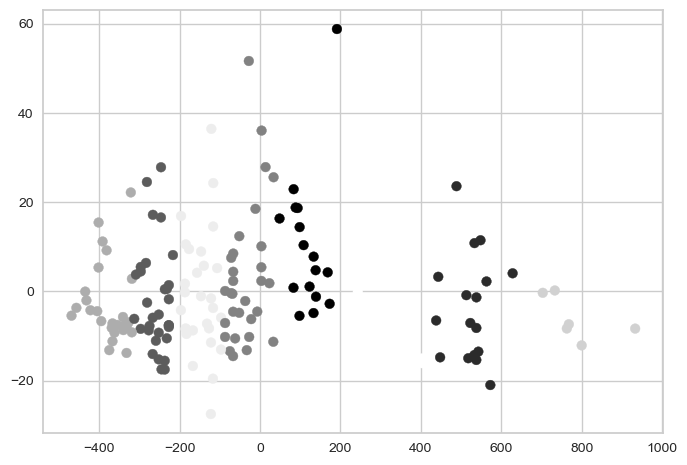

In [26]:
# mostramos los datos en 2D usando PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters)

In [27]:
# mostramos los datos agrupados por cluster

X["cluster"] = clusters

X.groupby("cluster").agg("mean")

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
cluster,,,,,,,,,,,,,
0,13.751250,1.969167,2.348750,16.975000,105.041667,2.794583,2.921667,0.272500,1.895417,5.168333,1.057500,3.189167,1057.708333
1,12.708929,2.771071,2.398214,21.360714,96.428571,1.899643,1.203214,0.408214,1.291071,5.238214,0.837500,2.149286,599.714286
2,14.136667,1.831667,2.411667,16.266667,107.666667,3.255000,3.493333,0.271667,2.216667,7.233333,1.113333,3.028333,1530.333333
3,12.386923,2.304615,2.223077,20.365385,90.115385,2.359615,2.186154,0.348077,1.625000,3.088462,1.030000,2.766538,371.730769
4,12.997333,2.662000,2.364000,19.330000,102.433333,2.109667,1.574333,0.402667,1.539000,5.824667,0.898667,2.346000,710.233333
5,12.549032,2.342581,2.327742,20.864516,93.064516,1.892903,1.607419,0.412903,1.337097,4.676452,0.902258,2.358065,489.129032
6,13.762353,1.780588,2.540588,17.358824,105.411765,2.832941,2.975882,0.308235,1.823529,5.916471,1.095294,3.038235,1270.882353
7,13.028125,2.335000,2.448750,19.731250,112.125000,2.328750,1.996875,0.352500,1.710625,5.352500,0.911625,2.683125,865.500000


## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [28]:
# entrenamos el modelo con Kmeans usando 5 clusters

kmeans = KMeans(n_clusters=5)

clusters = kmeans.fit_predict(X)

# computamos el silhouette score para ver que tan bien se agrupan los datos

from sklearn.metrics import silhouette_score

silhouette_score(X, clusters)

c:\Users\luiso\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\luiso\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.5490213331837004

## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [29]:
# entrenamos el modelo con Kmeans usando 3 clusters

kmeans = KMeans(n_clusters=3)

clusters = kmeans.fit_predict(X)

# computamos el silhouette score para ver que tan bien se agrupan los datos

from sklearn.metrics import silhouette_score

silhouette_score(X, clusters)

c:\Users\luiso\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\luiso\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.5710593068773416

## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

In [30]:
# instalamos la libreria

%pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


c:\Users\luiso\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\luiso\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\luiso\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\luiso\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

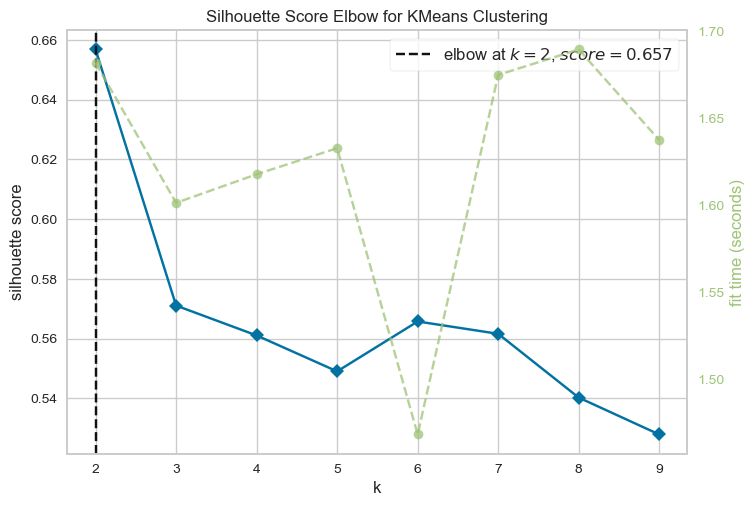

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [31]:
# usamos la metrica 'silhouette' de la libreria yellowbrick para visualizar el elbow

from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(kmeans, k=(2,10), metric='silhouette')

visualizer.fit(X)        

visualizer.poof()        

c:\Users\luiso\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\luiso\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\luiso\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\luiso\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

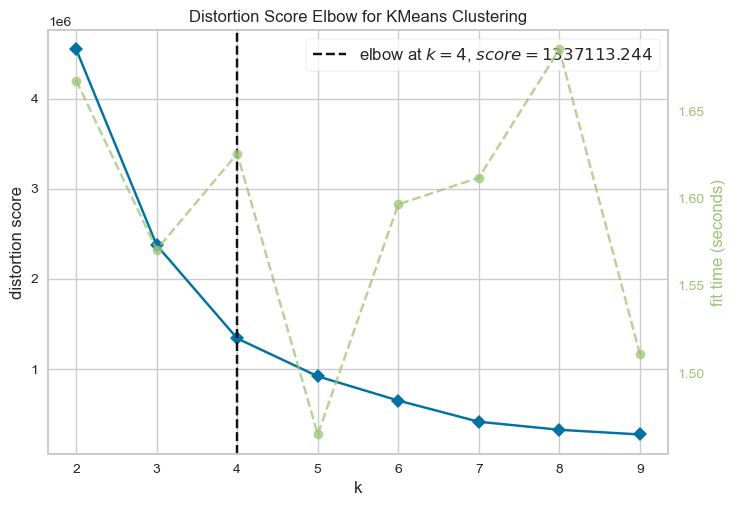

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [32]:
# usamos la metrica distorsion de la libreria yellowbrick para visualizar el elbow

visualizer = KElbowVisualizer(kmeans, k=(2,10), metric='distortion')

visualizer.fit(X)        

visualizer.poof()        


In [33]:
# usamos la metrica calinski_harabaz de la libreria yellowbrick para visualizar el elbow

visualizer = KElbowVisualizer(kmeans, k=(2,10), metric='calinski_harabaz')

visualizer.fit(X)

visualizer.poof()

YellowbrickValueError: '{}' is not a defined metric use one of distortion, silhouette, or calinski_harabasz

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

In [34]:
# hacemos los mismos tests con AgglomerativeClustering

from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=8)

clusters = agg.fit_predict(X)

silhouette_score(X, clusters)

0.529804230636664

In [35]:

agg = AgglomerativeClustering(n_clusters=5)

clusters = agg.fit_predict(X)

silhouette_score(X, clusters)

0.5073953671458452

In [36]:

agg = AgglomerativeClustering(n_clusters=3)

clusters = agg.fit_predict(X)

silhouette_score(X, clusters)

0.5643967361829278

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

## 8. Generate a series of t-SNE plots showing the clusters at a variety of perplexities.